In [1]:
import numpy as np
import pandas as pd

In [7]:
df =  pd.read_csv('spam.csv')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
708,spam,To review and KEEP the fantastic Nokia N-Gage ...,NaN,NaN,NaN
379,ham,I taught that Ranjith sir called me. So only i...,NaN,NaN,NaN
4549,ham,\Hey! do u fancy meetin me at 4 at cha �� hav ...,NaN,NaN,NaN
4831,ham,Rats. Hey did u ever vote for the next themes?,NaN,NaN,NaN
2433,ham,Indians r poor but India is not a poor country...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [ ]:
#1. Data Cleaning
#2. Exploratory Data Analysis
#3. Text Preprocessing
#4. Model Build
#5. Evaluation
#6. Improvements if needed
#7. Website
#8. Deploy 

1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
57,ham,"Sorry, I'll call later in meeting."
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...
185,ham,Hello handsome ! Are you finding that job ? No...
3344,ham,Reverse is cheating. That is not mathematics.
4837,ham,All boys made fun of me today. Ok i have no pr...


In [15]:
#renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5298,ham,I.ll hand her my phone to chat wit u
2528,ham,jay says he'll put in &lt;#&gt;
1801,ham,I wanna watch that movie
3972,ham,"Night night, see you tomorrow"
1322,ham,Oh just getting even with u.... u?


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#checking for duplicate values
df.duplicated().sum()

403

In [22]:
#removing dupes
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

2. Exploratory Data Analysis or EDA

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

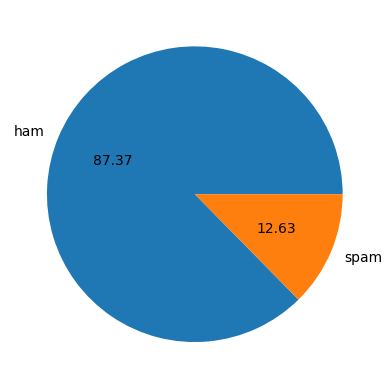

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
#Data is imbalanced

In [31]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
df['num_char'] = df['text'].apply(len)

In [35]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#ham messages
df[df['target']== 0 ][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
#spam messages
df[df['target']== 1 ][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [48]:
import seaborn as sns

<AxesSubplot: xlabel='num_char', ylabel='Count'>

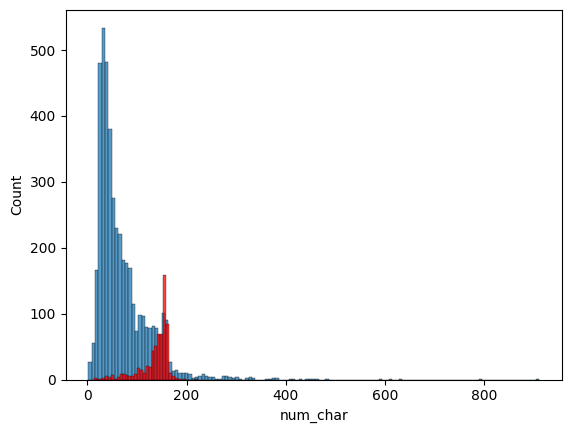

In [49]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

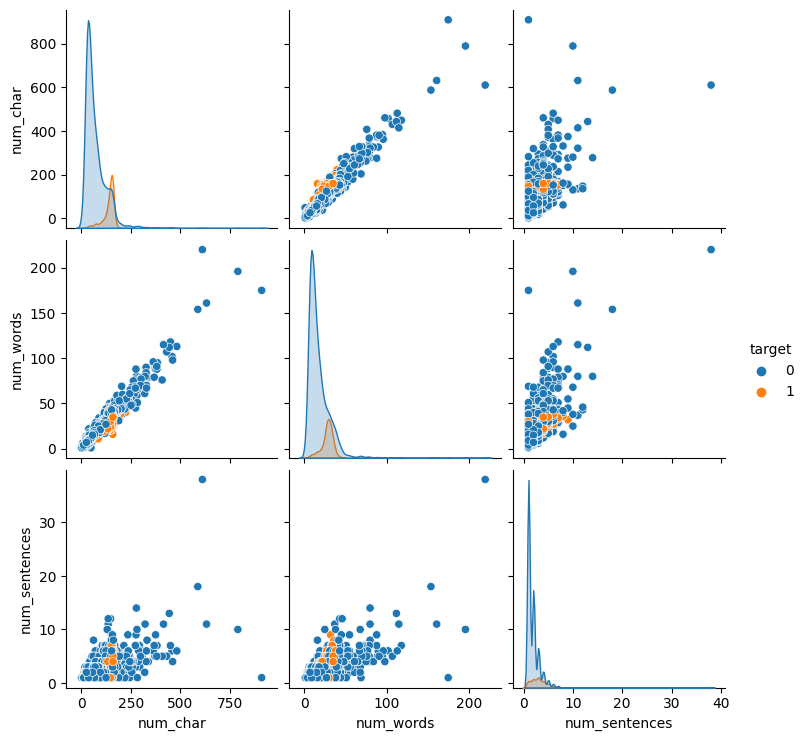

In [50]:
sns.pairplot(df,hue='target')

3. Data Preprocessing
-> Lower Case
-> Tokenization
-> Removing special Character
-> Removing Stop words
-> Stemming

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y 
    

In [ ]:
#last checkpoint 35:58
